In [1]:
!pip install -Uqq gradio

     |████████████████████████████████| 871 kB 6.9 MB/s 
     |████████████████████████████████| 52 kB 928 kB/s 
     |████████████████████████████████| 1.1 MB 58.1 MB/s 
     |████████████████████████████████| 210 kB 70.3 MB/s 
     |████████████████████████████████| 2.0 MB 54.4 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 271 kB 66.2 MB/s 
     |████████████████████████████████| 144 kB 53.1 MB/s 
     |████████████████████████████████| 94 kB 4.9 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 
     |████████████████████████████████| 10.9 MB 44.0 MB/s 
     |████████████████████████████████| 79 kB 10.4 MB/s 
     |████████████████████████████████| 3.6 MB 38.0 MB/s 
     |████████████████████████████████| 61 kB 524 kB/s 
     |████████████████████████████████| 856 kB 70.4 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.6 MB/s 
     |████████████████████████████████| 1.2 MB 1.7 MB/s 
     |████████████████████████████████| 189 kB 54.8 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 51 kB 261 kB/s 
Mounted at /content/gdrive


In [3]:
import gradio as gr
from fastbook import *

In [4]:
path = Path('gdrive/MyDrive/anime-image-labeller/safebooru')

In [5]:
"""
Get the prediction labels and their accuracies, then return the results as a dictionary.

[obj] - tensor matrix containing the predicted accuracy given from the model
[learn] - fastai learner needed to get the labels
[thresh] - minimum accuracy threshold to returning results
"""
def get_pred_classes(obj, learn, thresh):
    labels = []
    # get list of classes from csv--replace
    with open(path/'classes.txt', 'r') as f:
      for line in f:
        labels.append(line.strip('\n'))

    predictions = {}
    x=0
    for item in obj:
        acc= round(item.item(), 3)
        if acc > thresh:
            predictions[labels[x]] = round(acc, 3)
        x+=1

    predictions =sorted(predictions.items(), key=lambda x: x[1], reverse=True)

    return predictions

In [9]:
def get_x(r): return path/'images'/r['img_name']
def get_y(r): return [t for t in r['tags'].split(' ') if t in pop_tags]

In [10]:
learn = load_learner(path/'model-large-40e.pkl')

In [11]:
def predict_single_img(imf, thresh=0.2, learn=learn):
  
  img = PILImage.create(imf)

  #img.show() #show image
  _, _, pred_pct = learn.predict(img) #predict while ignoring first 2 array inputs
  img.show() #show image
  return str(get_pred_classes(pred_pct, learn, thresh))

"[('solo', 0.617), ('1boy', 0.461), ('male_focus', 0.435), ('short_hair', 0.43), ('red_eyes', 0.401), ('1girl', 0.312), ('upper_body', 0.216), ('male', 0.211)]"

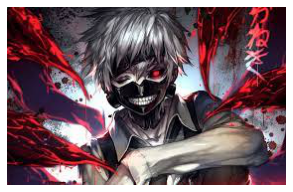

In [12]:
predict_single_img(path/'test/mask.jpeg')

In [13]:
iface = gr.Interface(fn=predict_single_img, 
                     inputs=["image","number"], 
                     outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://59416.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f7611b0b910>,
 'http://127.0.0.1:7860/',
 'https://59416.gradio.app')